In [1]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train_data = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 12 naive bayes\SalaryData_Train.csv")

In [3]:
test_data = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 12 naive bayes\SalaryData_Test.csv")

In [7]:
train_data.head(8)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [8]:
test_data.head(8)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<Axes: xlabel='age', ylabel='educationno'>

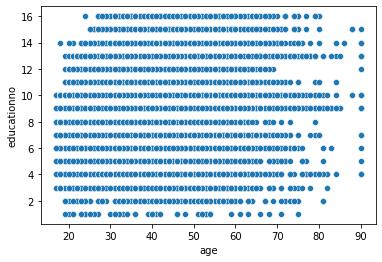

In [9]:
sns.scatterplot(x=train_data.age, y=train_data.educationno,data=train_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x26e4ec8faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x26e4eca3070>,
 'boxes': [<matplotlib.lines.Line2D at 0x26e4ec8f850>],
 'medians': [<matplotlib.lines.Line2D at 0x26e4eca35b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e4eca3850>],
 'means': []}

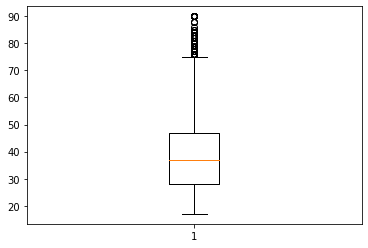

In [10]:
plt.boxplot(train_data.age)

(array([4869., 5579., 5760., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

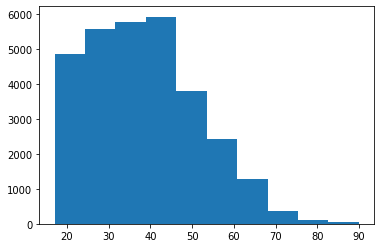

In [11]:
plt.hist(train_data.age)

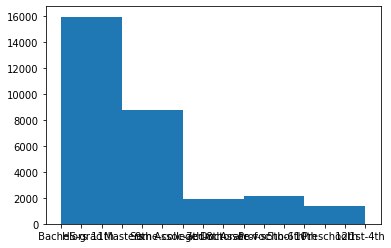

In [12]:
plt.hist(train_data.education,bins=5);

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [14]:
### splitting the data 
x_train=train_data.drop('Salary',axis=1)

In [15]:
y_train=train_data.Salary

In [16]:
x_test = test_data.drop('Salary',axis = 1)

In [17]:
y_test = test_data.Salary

In [18]:
model = BernoulliNB()

In [19]:
x_train = pd.get_dummies(x_train)

In [20]:
x_test = pd.get_dummies(x_test)

In [21]:
### building the model
model.fit(x_train,y_train)

BernoulliNB()

In [22]:
model.score(x_test,y_test)

0.7598273572377158

In [24]:
model.score(x_train,y_train)

0.7555120851430656